<a href="https://colab.research.google.com/github/ahmadcah/project_pembelajaran_mesin_2018-198/blob/main/GoogleColab/trainBirdsModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds

splits = ['train', 'test[:17%]', 'test[1%:]']
splits, info = tfds.load('CaltechBirds2011', split=splits, shuffle_files=True, with_info=True)
(train_examples, validation_examples, test_examples) = splits
train_len = len(list(train_examples))
validation_len = len(list(validation_examples))
test_len = len(list(test_examples))
print(train_len)
print(validation_len)
print(test_len)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/caltech_birds2011/0.1.1.incompleteTVY1U2/caltech_birds2011-train.tfrecord


  0%|          | 0/5994 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/caltech_birds2011/0.1.1.incompleteTVY1U2/caltech_birds2011-test.tfrecord


  0%|          | 0/5794 [00:00<?, ? examples/s]

Dataset caltech_birds2011 downloaded and prepared to /root/tensorflow_datasets/caltech_birds2011/0.1.1. Subsequent calls will reuse this data.
5994
985
5736


In [2]:
import tensorflow as tf

num_examples = 500 
num_classes = 200
BATCH_SIZE =  64 
IMAGE_SIZE = (250,250)

def format_image(features):
  image = features['image']
  image = tf.image.resize(image, IMAGE_SIZE) / 255.0
  return  image, features['label']

train_batches = train_examples.shuffle(num_examples).map(format_image).batch(BATCH_SIZE)
validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE)
test_batches = test_examples.map(format_image).batch(BATCH_SIZE)

In [3]:
import tensorflow as tf

num_examples = 500 
num_classes = 200
BATCH_SIZE = 25
IMAGE_SIZE = (250,250)

def format_image(features):
  image = features['image']
  image = tf.image.resize(image, IMAGE_SIZE) / 255.0
  return  image, features['label']

train_batches = train_examples.shuffle(num_examples).map(format_image).batch(BATCH_SIZE)
validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE)
test_batches = test_examples.map(format_image).batch(BATCH_SIZE)

In [38]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 250, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(200, activation='softmax')  
])
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 124, 124, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 31, 31, 64)      

In [39]:
callbacksEarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
class CallbackAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if logs.get('acc') > 0.98 and logs.get('val_acc') > 0.98:
            self.model.stop_training = True

In [40]:
from tensorflow.keras.optimizers import Adam

model1.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

In [41]:
H1 = model1.fit(train_batches,
                epochs=200, 
                validation_data=validation_batches,
                callbacks=[callbacksEarlyStopping, CallbackAccuracy()])

Epoch 1/200
240/240 [==============================] - 10s 39ms/step - loss: 5.2892 - acc: 0.0048 - val_loss: 5.1813 - val_acc: 0.0122
Epoch 2/200
240/240 [==============================] - 10s 39ms/step - loss: 5.0923 - acc: 0.0092 - val_loss: 5.0249 - val_acc: 0.0102
Epoch 3/200
240/240 [==============================] - 10s 38ms/step - loss: 4.9638 - acc: 0.0110 - val_loss: 4.9321 - val_acc: 0.0112
Epoch 4/200
240/240 [==============================] - 10s 39ms/step - loss: 4.8256 - acc: 0.0177 - val_loss: 4.7028 - val_acc: 0.0264
Epoch 5/200
240/240 [==============================] - 10s 38ms/step - loss: 4.5421 - acc: 0.0425 - val_loss: 4.4878 - val_acc: 0.0599
Epoch 6/200
240/240 [==============================] - 10s 39ms/step - loss: 4.3055 - acc: 0.0614 - val_loss: 4.3848 - val_acc: 0.0741
Epoch 7/200
240/240 [==============================] - 10s 39ms/step - loss: 4.0766 - acc: 0.0921 - val_loss: 4.1796 - val_acc: 0.0924
Epoch 8/200
240/240 [==============================] - 

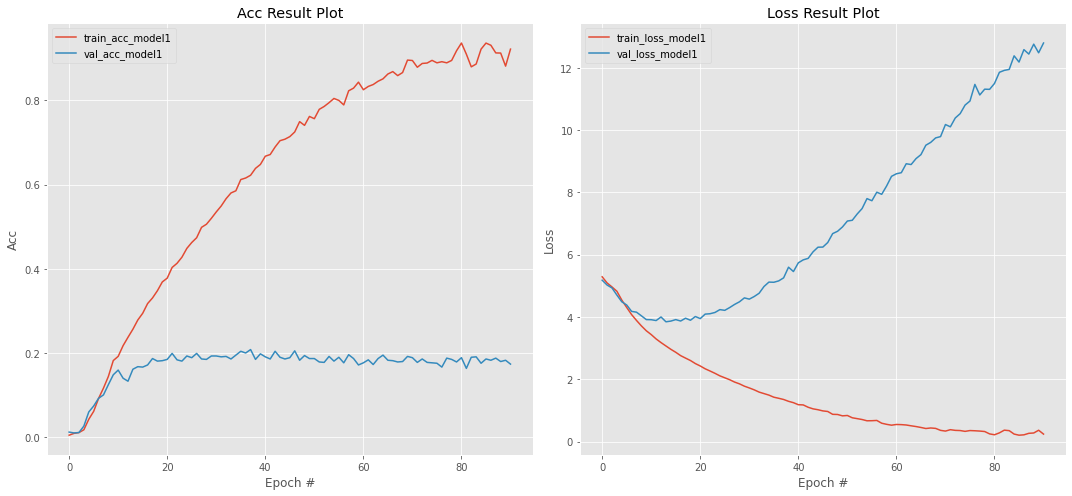

In [43]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axes[0].plot(np.arange(0, len(H1.history["acc"])), H1.history["acc"], label="train_acc_model1")
axes[0].plot(np.arange(0, len(H1.history["val_acc"])), H1.history["val_acc"], label="val_acc_model1")
axes[0].legend()
axes[1].plot(np.arange(0, len(H1.history["loss"])), H1.history["loss"], label="train_loss_model1")
axes[1].plot(np.arange(0, len(H1.history["val_loss"])), H1.history["val_loss"], label="val_loss_model1")
axes[1].legend()
plt.setp(axes[0],title='Acc Result Plot', xlabel="Epoch #", ylabel="Acc")
plt.setp(axes[1],title='Loss Result Plot', xlabel="Epoch #", ylabel="Loss")
fig.tight_layout()

In [ ]:
print(test_batches)

<BatchDataset shapes: ((None, 250, 250, 3), (None,)), types: (tf.float32, tf.int64)>


In [ ]:
from sklearn.metrics import classification_report
print("\n model1\n")
test_labels=np.concatenate([y for x, y in test_batches], axis=0)
pred = model1.predict(test_batches)
y_pred = np.argmax(pred, axis=-1)
print(classification_report(test_labels, y_pred))


 model1

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        16
           4       0.21      0.38      0.27         8
           5       0.06      0.25      0.10         4
           6       0.09      0.10      0.10        10
           7       0.17      0.11      0.13         9
           8       0.08      0.12      0.10        16
           9       0.20      0.25      0.22        12
          10       0.00      0.00      0.00        15
          11       0.33      0.20      0.25        15
          12       0.17      0.19      0.18        21
          13       0.27      0.35      0.30        20
          14       0.22      0.12      0.16        16
          15       0.43      0.56      0.49        18
          16       0.18      0.20      0.19        15
          17     

In [45]:
plt.savefig("/content/drive/MyDrive/Model/model1Bird200Eval.svg")
model1.save('/content/drive/MyDrive/Model/model1Bird200.h5')

<Figure size 432x288 with 0 Axes>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
